## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LR = 0.001
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9,0.95,0.85,0.8]


In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in range(2):
    for momentum in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LR, nesterov=i, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-momentum-%s" % str(momentum)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0717 19:46:55.479856 25904 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 19:46:55.482853 25904 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 19:46:55.554812 25904 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 19:46:55.645760 25904 deprecation.py:323] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a futu

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0289 - acc: 0.2707 - val_loss: 1.8681 - val_acc: 0.3316
Epoch 2/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8105 - acc: 0.3601 - val_loss: 1.7597 - val_acc: 0.3785
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7304 - acc: 0.3915 - val_loss: 1.6937 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6786 - acc: 0.4101 - val_loss: 1.6630 - val_acc: 0.4128
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6296 - acc: 0.4254 - val_loss: 1.6053 - val_acc: 0.4398
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5921 - acc: 0.4398 - val_loss: 1.5780 - val_acc: 0.4432
Epoch 7/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5541 - acc: 0.4528 - val_loss: 1.5472 - 

50000/50000 [==============================] - 5s 107us/step - loss: 1.9443 - acc: 0.3145 - val_loss: 1.8990 - val_acc: 0.3326
Epoch 3/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8676 - acc: 0.3433 - val_loss: 1.8438 - val_acc: 0.3488
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8188 - acc: 0.3632 - val_loss: 1.7987 - val_acc: 0.3664
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7807 - acc: 0.3766 - val_loss: 1.7698 - val_acc: 0.3830
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7514 - acc: 0.3864 - val_loss: 1.7447 - val_acc: 0.3858
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7247 - acc: 0.3954 - val_loss: 1.7148 - val_acc: 0.3993
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7030 - acc: 0.4047 - val_loss: 1.6884 - val_acc: 0.4131
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 102us/step - loss: 1.8891 - acc: 0.3401 - val_loss: 1.8629 - val_acc: 0.3445
Epoch 4/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8422 - acc: 0.3534 - val_loss: 1.8293 - val_acc: 0.3634
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8096 - acc: 0.3654 - val_loss: 1.7952 - val_acc: 0.3734
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7821 - acc: 0.3765 - val_loss: 1.7674 - val_acc: 0.3782
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7575 - acc: 0.3846 - val_loss: 1.7489 - val_acc: 0.3870
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7369 - acc: 0.3919 - val_loss: 1.7295 - val_acc: 0.3851
Epoch 9/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7177 - acc: 0.4011 - val_loss: 1.7082 - val_acc: 0.3988
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 110us/step - loss: 1.7608 - acc: 0.3856 - val_loss: 1.7434 - val_acc: 0.3918
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7187 - acc: 0.3995 - val_loss: 1.7137 - val_acc: 0.3946
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6850 - acc: 0.4090 - val_loss: 1.6813 - val_acc: 0.4121
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6563 - acc: 0.4209 - val_loss: 1.6578 - val_acc: 0.4138
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6289 - acc: 0.4307 - val_loss: 1.6264 - val_acc: 0.4315
Epoch 9/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6055 - acc: 0.4380 - val_loss: 1.6135 - val_acc: 0.4304
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5847 - acc: 0.4439 - val_loss: 1.5955 - val_acc: 0.4372
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 5s 109us/step - loss: 1.6172 - acc: 0.4329 - val_loss: 1.6057 - val_acc: 0.4379
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5769 - acc: 0.4477 - val_loss: 1.5684 - val_acc: 0.4484
Epoch 7/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5434 - acc: 0.4590 - val_loss: 1.5468 - val_acc: 0.4523
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5130 - acc: 0.4703 - val_loss: 1.5374 - val_acc: 0.4634
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4846 - acc: 0.4800 - val_loss: 1.5143 - val_acc: 0.4636
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4610 - acc: 0.4865 - val_loss: 1.4940 - val_acc: 0.4735
Epoch 11/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4362 - acc: 0.4952 - val_loss: 1.4811 - val_acc: 0.4682
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 5s 109us/step - loss: 1.7330 - acc: 0.3942 - val_loss: 1.7231 - val_acc: 0.3983
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7071 - acc: 0.4037 - val_loss: 1.6985 - val_acc: 0.4050
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6837 - acc: 0.4120 - val_loss: 1.6771 - val_acc: 0.4117
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6626 - acc: 0.4198 - val_loss: 1.6610 - val_acc: 0.4124
Epoch 10/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6433 - acc: 0.4264 - val_loss: 1.6465 - val_acc: 0.4195
Epoch 11/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6254 - acc: 0.4322 - val_loss: 1.6216 - val_acc: 0.4302
Epoch 12/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6069 - acc: 0.4380 - val_loss: 1.6249 - val_acc: 0.4289
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 5s 109us/step - loss: 1.7551 - acc: 0.3861 - val_loss: 1.7463 - val_acc: 0.3868
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7340 - acc: 0.3939 - val_loss: 1.7248 - val_acc: 0.3966
Epoch 9/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7155 - acc: 0.4003 - val_loss: 1.7102 - val_acc: 0.4007
Epoch 10/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6988 - acc: 0.4051 - val_loss: 1.6998 - val_acc: 0.4047
Epoch 11/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6828 - acc: 0.4115 - val_loss: 1.6797 - val_acc: 0.4149
Epoch 12/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6678 - acc: 0.4176 - val_loss: 1.6687 - val_acc: 0.4185
Epoch 13/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6534 - acc: 0.4212 - val_loss: 1.6552 - val_acc: 0.4202
Epoch 14/50
50000/50000 [================

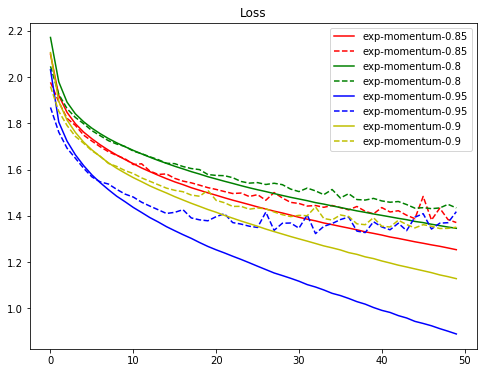

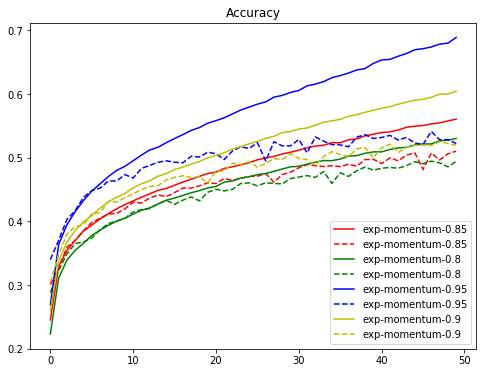

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()